# STAT207 Mini-Project #1 - Top Spotify Songs 2023


Austin Kirwin

In [43]:
#Imports here
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf 

## 1. Introduction

Throughout this mini-project I will be determining the nature of the relationship between danceability_% and energy_% with the number of streams for some of the top spotify songs of 2023.

## 2. Dataset Discussion

### 2.1 Where to find + reading into a csv

I found the spotify-2023.csv file on Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) and downloaded it 2/11/2024.

Reading the csv into a Dataframe and displaying the first 5 rows

In [44]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


Number of rows in dataframe

In [45]:
df.shape[0]

953

### 2.2 Some pre-analysis discussion

In this dataset, each row represents a different song on Spotify with all the information coming from Spotify themselves. This dataset only considers the top roughly 950 songs. Artists whose songs are not as close to the top songs of 2023 might not be able to apply the findings or information from my analysis due to extrapolation. Throughout this analysis I will be focusing on the relationship between danceability_%, mode, and streams. The danceability percentage is defined as the percentage indicating how suitable a song is for dancing. The mode is the key (major or minor) that the song is in. Finally, streams is the total number of times the song has been streamed on Spotify.

## 3. Dataset Cleaning

### 3.1 Removing implicit and explict values

Removal of NaN values...

In [46]:
df_clean = df.dropna()
df_clean

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [47]:
df.shape[0] - df_clean.shape[0]

136

In [48]:
#Checking for implicit values
df_clean.dtypes
pd.set_option('display.max_rows',None)
df_clean[['streams']].reset_index()
df_clean.iloc[478]
df_clean = df_clean[df_clean['track_name'] != 'Love Grows (Where My Rosemary Goes)']
#The streams for this track were improperly inputted and the entire string in place of streams cannot be viewed; therefore it is being removed by name
df_clean[['streams']] = df_clean[['streams']].astype('float')
#Streams is still of dtype 'object' so it is being converted to float (the values are too large to be ints)
df_clean.dtypes
pd.reset_option('display.max_rows')
df_clean

C:\Users\diamo\AppData\Local\Temp\ipykernel_33164\3511312894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['streams']] = df_clean[['streams']].astype('float')


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


There was also a value in streams that was below 3000 (more than likely a typo) which doesn't makes sense given the context of a data set with the top songs on spotify. So that value is getting removed.

In [57]:
df_clean = df_clean[df_clean['streams'] > 3000]
df_clean[['streams']].min()

streams    1365184.0
dtype: float64

Roughly 1.4 million streams seems much more reasonable for a roughly top 800 spotify song.

In [50]:
#Keeping only the columns we need
df_new = df_clean[['track_name','artist(s)_name','streams','danceability_%','mode']]
df_new

,track_name,artist(s)_name,streams,danceability_%,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703.0,80,Major
1,LALA,Myke Towers,133716286.0,71,Major
2,vampire,Olivia Rodrigo,140003974.0,51,Major
3,Cruel Summer,Taylor Swift,800840817.0,55,Major
4,WHERE SHE GOES,Bad Bunny,303236322.0,65,Minor
...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,91473363.0,60,Major
949,Bigger Than The Whole Sky,Taylor Swift,121871870.0,42,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",73513683.0,80,Major
951,En La De Ella,"Feid, Sech, Jhayco",133895612.0,82,Major


Dropping the missing values allows for a cleaner analysis later on in terms of linear regression and training a model. However, it reduces the representation of a data set that already only represents songs on spotify in a so-called upper echelon of all spotify songs.

### 3.2 Categorical Variable(s) Cleaning

In [51]:
len(df_new[df_new['mode'] == 'Major'])

450

In [52]:
len(df_new[df_new['mode'] == 'Minor'])

365

Since the categorical variable 'mode' has a significant number of observations in each of its values, there is no need to drop any rows corresponding to a specific value.

### 3.3 Outlier Cleaning

<Axes: xlabel='mode', ylabel='streams'>

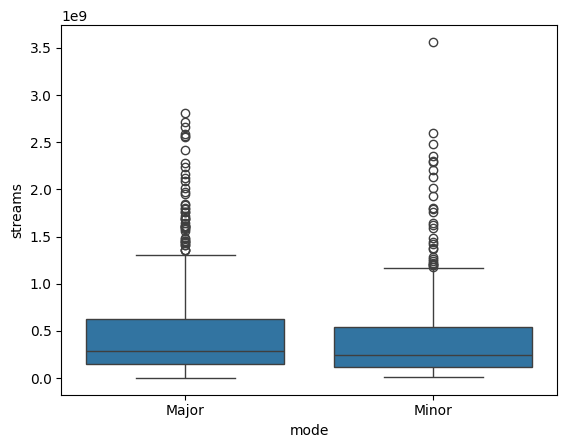

In [53]:
sns.boxplot(x = 'mode', y = 'streams', data = df_new)

<Axes: xlabel='mode', ylabel='danceability_%'>

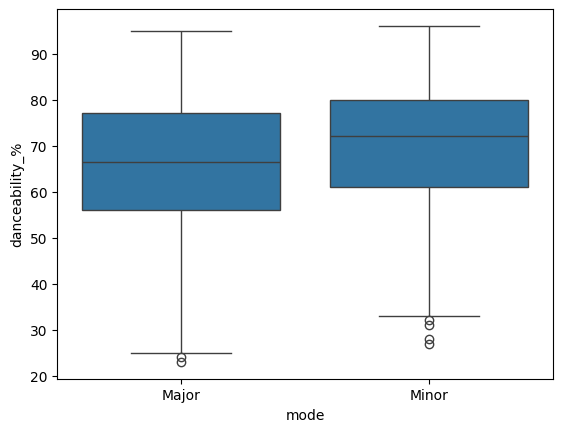

In [54]:
sns.boxplot(x = 'mode', y = 'danceability_%', data = df_new)

There appear to be a lot of outliers when comparing stream counts between the Major and Minor modes but not as many with danceability and each mode. However, dropping all of these outliers--or even just a few--with really high values would cut down on an already exclusive data set and would not accurately represent the relationship between these variables.

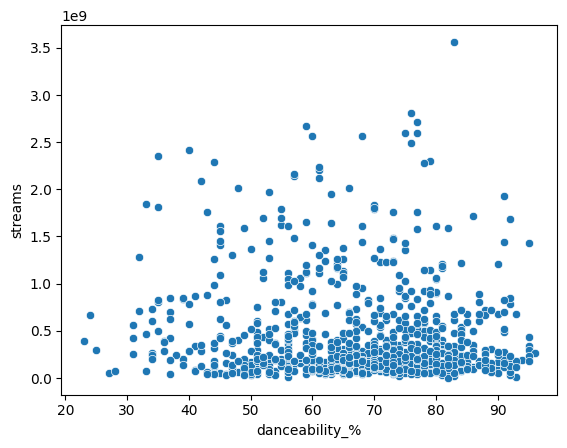

In [67]:
sns.scatterplot(x = 'danceability_%', y = 'streams', data = df_new)
plt.show()

As there does not appear to be a linear relationship between danceability and streams it is hard to determine if there are any outliers aside from the song with more than 3.5*10^9 streams and roughly 83 danceability %. This outlier will not be dropped as it is doubtful it will have a massive impact when the relationship between danceability and streams is already so non-existent.

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

### 4.1 Plots and Correlation

Research Question: How does the relationship between danceability % and streams change based on different vales of mode in the dataset.

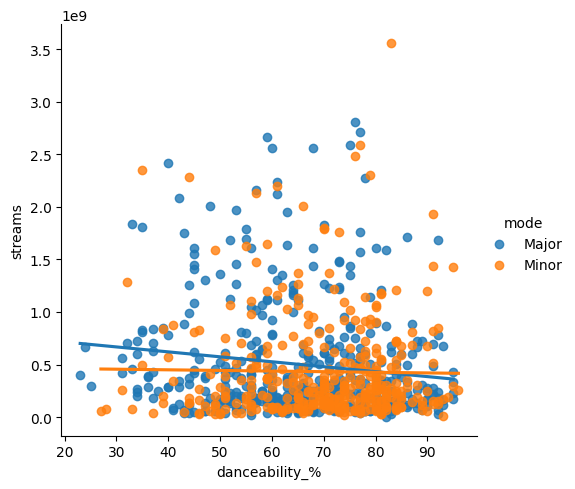

In [71]:
sns.lmplot(x = 'danceability_%', y = 'streams', hue='mode', data = df_new, ci = False)
plt.show()

Based on this graph, danceability and streams do not have a strong correlation in either mode. Both correlations are negative and weak and there does not appear to be a significant difference between the two relationships.

In [72]:
df_new[['streams','danceability_%','mode']].groupby(['mode']).corr()

streams  danceability_%
mode                                          
Major streams         1.000000       -0.132647
      danceability_% -0.132647        1.000000
Minor streams         1.000000       -0.016142
      danceability_% -0.016142        1.000000

The weak, negative correlation is confirmed in the table; additionally, according to the boxplots from 3.3, it can be determined that there is little to no association between mode and danceability or mode and streams. 

## 5. Conclusion

According to the findings of my analysis, the relationship between danceability % and streams on spotify does not change based on the mode of the song (Major or Minor key). However, some shortcomings of this analysis are that it doesn't consider other factors in the data set, and the analysis didn't remove outliers which may have affected the end result (although this was a conscious choice). If someone were to use this analysis as the basis for their song writing, they might believe that mode and danceability do not affect how many streams a song can get, although it is possible that with other factors they are more important. In the future I would use more explanatory variables and/or choose different ones to see how they interact with the response variable